# Model selection and refinement

Next we will examine the subsets we identified in the last stage more closely.

## Imports

In [1]:
# Set module path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import floor

import src.regression as rg
import src.subset_selection as ss

## Data

In [3]:
data_dir = Path("../data/processed/")
data_file = data_dir / "ca-schools.csv"

df = pd.read_csv(data_file, index_col=None)
df.head()

,students,teachers,calworks,lunch,computer,expenditure,income,english,math
0,-2433.792857,-118.167377,-12.735842,-42.664437,-236.383333,1072.503592,7.373412,-15.768155,690.000000
1,-2388.792857,-117.917377,2.170659,3.211462,-202.383333,-213.026682,-5.492588,-11.184822,661.900024
2,-1078.792857,-46.167375,41.786257,31.617364,-134.383333,189.547049,-6.338588,14.231847,650.900024
3,-2385.792857,-115.067376,23.229357,32.343965,-218.383333,1789.423514,-6.338588,-15.768155,643.500000
4,-1293.792857,-57.567376,19.862559,33.721765,-132.383333,-76.419748,-6.236255,-1.910478,639.900024


## Model 1: $Y = X_0 + X_5 + \epsilon$

$Y$ - math

$X_0$ - intercept

$X_5$ - lunch

In [4]:
fm1 = """math ~ lunch"""

# Design matrices
y1, X1 = dmatrices(fm1, data=df, return_type='dataframe')

# Fit model
mod1 = sm.OLS(y1, X1)
res1 = mod1.fit()

print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     877.5
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          9.98e-105
Time:                        18:12:53   Log-Likelihood:                -1589.1
No. Observations:                 420   AIC:                             3182.
Df Residuals:                     418   BIC:                             3190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    653.3426      0.520   1255.406      0.0

### Residual plots

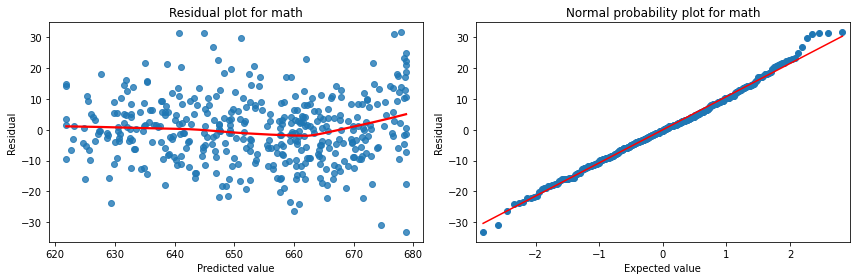

In [5]:
fig, ax = plt.subplots(1, 2, tight_layout=True)
fig.set_size_inches(12, 4)

sns.regplot(x=res1.fittedvalues, y=res1.resid, lowess=True, line_kws={'color': 'r'}, ax=ax[0]);
ax[0].set_xlabel("Predicted value");
ax[0].set_ylabel("Residual");
ax[0].set_title("Residual plot for math");

sm.graphics.qqplot(res1.resid, line='r', ax=ax[1]);
ax[1].set_xlabel("Expected value");
ax[1].set_ylabel("Residual");
ax[1].set_title("Normal probability plot for math");


fig_name = "16-residual-plots-mod1.png"
fig_path = Path("../reports/figures/")
plt.savefig(fig_path / fig_name)

The residual plot against the fitted values shows a slight tendency for the residuals to be positive for larger response values, indicating some curvature or the omission of important predictors. There does not appear to be any tendency for the residuals to change in magnitude for different predicted values. A few minor outlying cases are evident. The normal probability plot shows that the errors are approximately normal with some departures from normality at the tail.

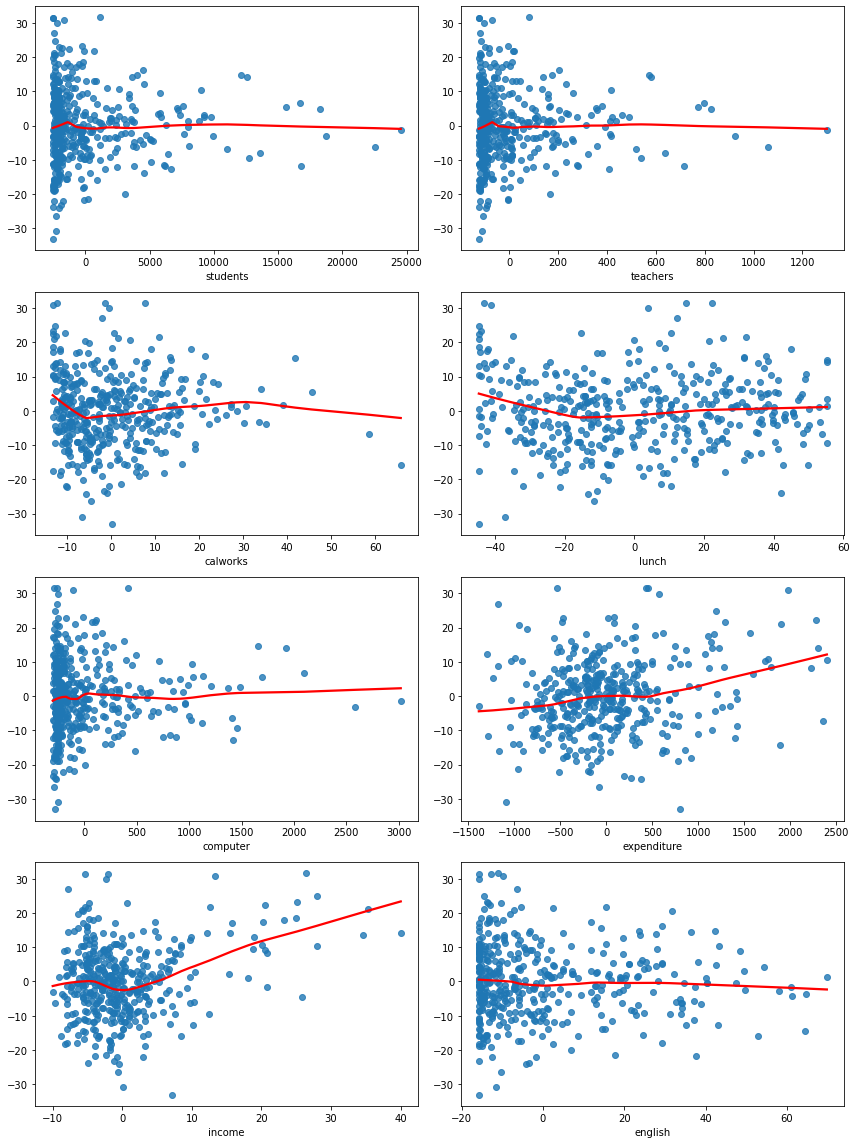

In [6]:
fig, ax = plt.subplots(4, 2, tight_layout=True)
fig.set_size_inches(12, 16)

ls = ['students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure',
      'income', 'english']

i = 0
for pred in ls:
    row = floor(i / 2)
    col = i % 2
    sns.regplot(x=df[pred], y=res1.resid, lowess=True,
                ax=ax[row, col], line_kws={'color': 'r'})
    i += 1
    
fig_name = "17-residual-plots-mod1.png"
plt.savefig(fig_path / fig_name)

The residual plot against income shows a clear tendency for the residuals to be positive for larger values of income. This indicates that income is an important predictor that has been omitted.

## Model 2: $Y = X_0 + X_5 + X_8 + \epsilon$

$Y$ - math

$X_0$ - intercept

$X_5$ - lunch

$X_8$ - income

In [7]:
fm2 = """math ~ lunch + income"""

# Design matrices
y2, X2 = dmatrices(fm2, data=df, return_type='dataframe')

# Fit model
mod2 = sm.OLS(y2, X2)
res2 = mod2.fit()

print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     516.0
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.66e-113
Time:                        18:12:55   Log-Likelihood:                -1565.1
No. Observations:                 420   AIC:                             3136.
Df Residuals:                     417   BIC:                             3148.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    653.3426      0.492   1327.643      0.0

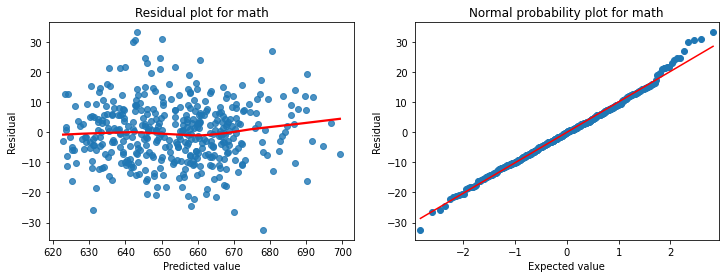

In [8]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

sns.regplot(x=res2.fittedvalues, y=res2.resid, lowess=True, line_kws={'color': 'r'}, ax=ax[0]);
ax[0].set_xlabel("Predicted value");
ax[0].set_ylabel("Residual");
ax[0].set_title("Residual plot for math");

sm.graphics.qqplot(res2.resid, line='r', ax=ax[1]);
ax[1].set_xlabel("Expected value");
ax[1].set_ylabel("Residual");
ax[1].set_title("Normal probability plot for math");

fig_name = "18-residual-plots-mod2.png"
plt.savefig(fig_path / fig_name)

The residual plot against predicted values shows no systematic tendency for the residuals to be positive or negative or vary in absolute value. A few outlying points are discernable. The normal probability plot shows the errors are approximately normal with some departures from normality at the tail. We note that the Jarque-Bera and Omnibus tests reject the assumption of normally distributed error terms at the 0.05 level of significance.

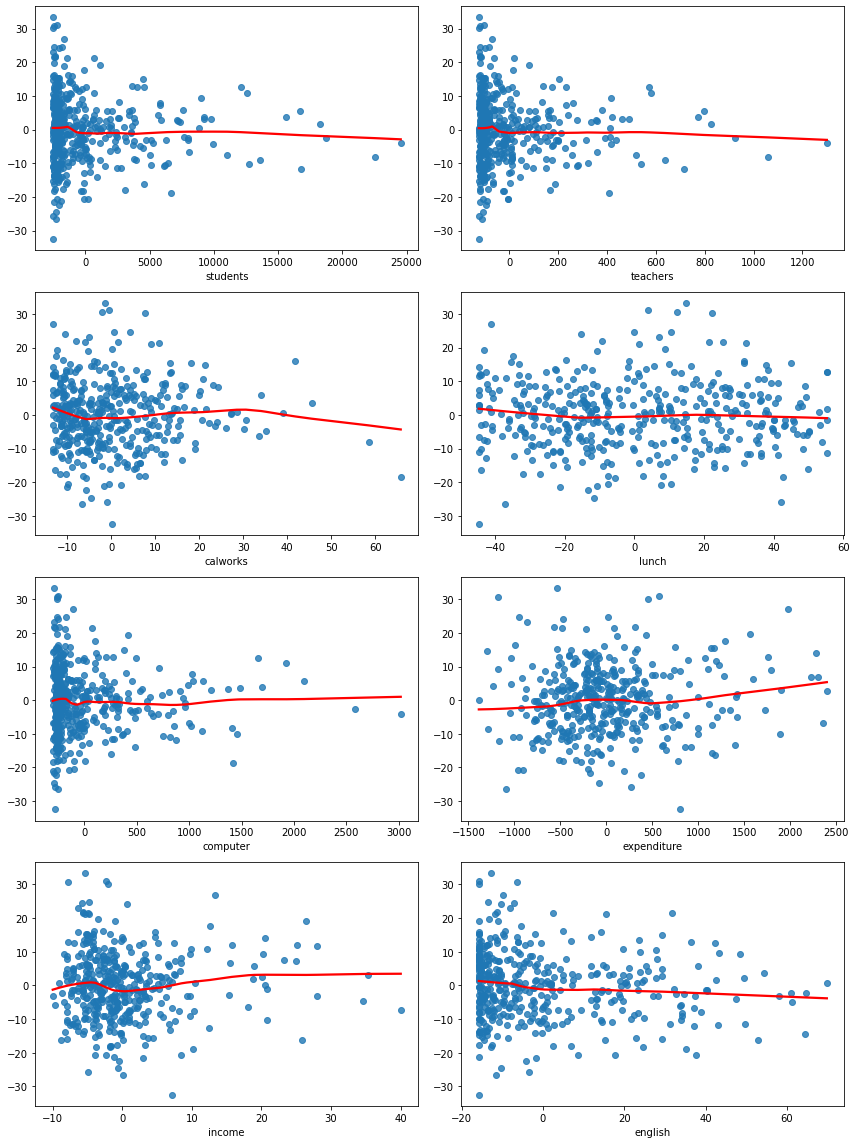

In [9]:
fig, ax = plt.subplots(4, 2, tight_layout=True)
fig.set_size_inches(12, 16)

ls = ['students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure',
      'income', 'english']

i = 0
for pred in ls:
    row = floor(i / 2)
    col = i % 2
    sns.regplot(x=df[pred], y=res2.resid, lowess=True,
                ax=ax[row, col], line_kws={'color': 'r'})
    i += 1
    
fig_name = "19-residual-plots-mod2.png"
plt.savefig(fig_path / fig_name)

The residual plots show no significant patterns of variation about 0. The residuals tend to decrease in magnitude for increasing values of students, teachers, computer, income, and english. This indicates some non-constancy in the error terms. 

eval_env: 1


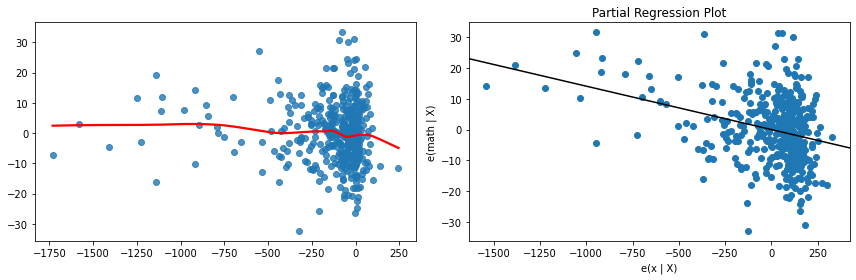

In [10]:
fig, ax = plt.subplots(1, 2, tight_layout=True)
fig.set_size_inches(12, 4)

sns.regplot(x=(df['lunch']*df['income']), y=res2.resid, lowess=True, 
            line_kws={'color': 'r'}, ax=ax[0]);
sm.graphics.plot_partregress(y1, (df['lunch']*df['income']), X1, 
                             ax=ax[1], obs_labels=False);

fig_name = "20-added-variable-mod2.png"
plt.savefig(fig_path / fig_name)

Including an interaction term for lunch and income appears to have a significant effect on the response.

### Outliers and influential cases?

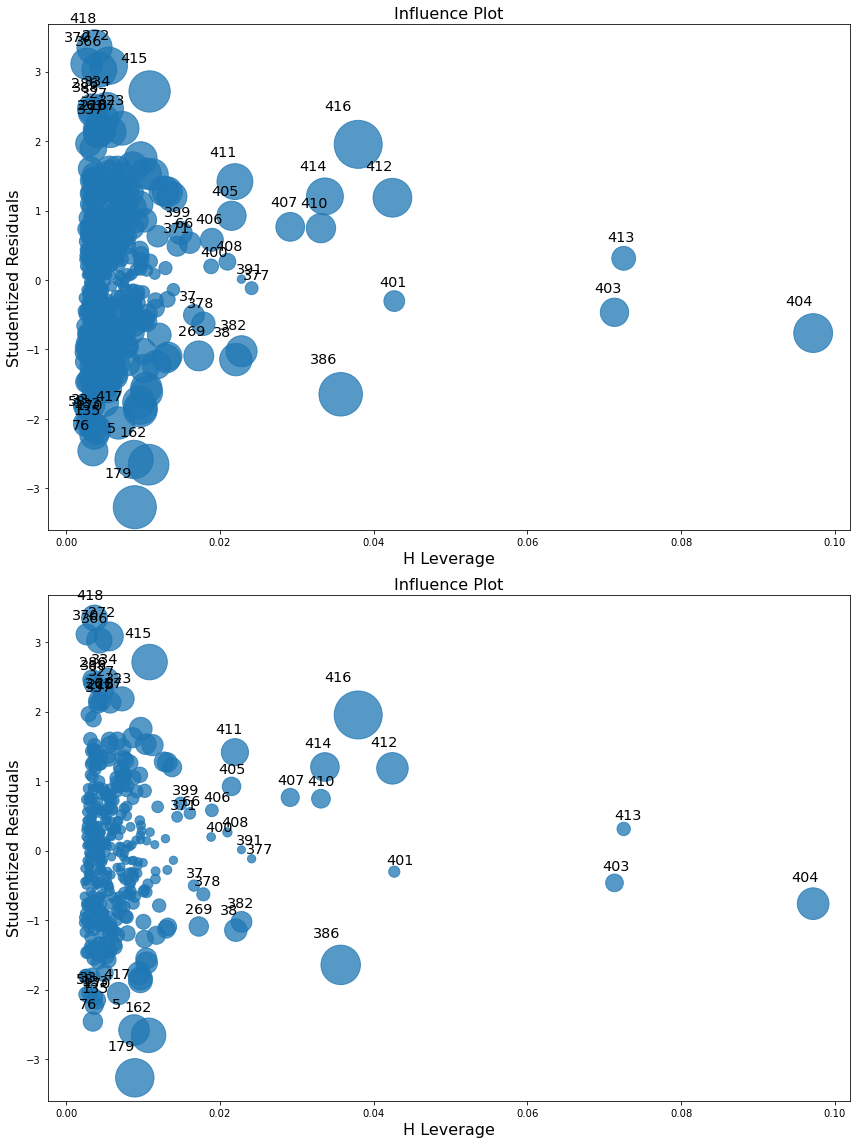

In [11]:
fig, ax = plt.subplots(2, 1, tight_layout=True)
fig.set_size_inches(12, 16)
sm.graphics.influence_plot(res2, criterion='dffits', ax=ax[0]);
sm.graphics.influence_plot(res2, criterion='cooks', ax=ax[1]);

fig_name = "21-influence-plot-mod2.png"
plt.savefig(fig_path / fig_name)

The influence plots show a number of outlying cases with respect to the response and with respect to the predictors. According to both the DFFITs and Cook's distance measures, case 416 appears to be the most influential. 

In [12]:
infl2 = res2.get_influence()
df_infl2 = infl2.summary_frame()

df_infl2.head()

,dfb_Intercept,dfb_lunch,dfb_income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.061752,-0.074164,-0.004765,0.004425,1.259386,0.008300,0.115217,1.260274,0.115298
1,0.066386,-0.036635,-0.061909,0.002762,1.356092,0.004485,0.091022,1.357462,0.091114
2,0.077657,0.060284,-0.008463,0.004755,1.584109,0.005652,0.119434,1.586991,0.119651
3,0.043087,0.035033,-0.003611,0.001506,0.880698,0.005791,0.067218,0.880461,0.067199
4,0.028237,0.025304,-0.000469,0.000679,0.577390,0.006071,0.045124,0.576928,0.045088


In [13]:
df_infl2.loc[416, ['dffits', 'cooks_d']]

dffits     0.388106
cooks_d    0.049872
Name: 416, dtype: float64

In [14]:
from scipy.stats import f

f.ppf(0.049872, dfn=3, dfd=417)

0.11697620161586968

The Cook's value corresponds only to the 12% percentile of the F distribution with 3 and 417 degrees of freedom, so we note that case 416 is not overly influential. Consequently, we conclude that none of the outliers are overly influential on the fitted regression function and no remedial measures are needed.

### Multicollinearity?

The correlation matrix shows a moderate pairwise correlation between lunch and income. To further investigate multicollinearity, we will examine the variance inflation factor.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['predictor'] = X2.columns
vif['vif'] = [variance_inflation_factor(X2, i) for i in range(X2.shape[1])]

vif

,predictor,vif
0,Intercept,1.000000
1,lunch,1.881317
2,income,1.881317


The max variance inflation factor for the predictors in the model falls well below 10. We conclude that multicollinearity is not a concern for the model.

## Model 3: $Y = X_0 + X_3 + X_5 + X_6 + X_7 + X_8 + X_9 + X_{10} + X_{11} + X_{13}$

In [16]:
fm3 = """math ~ calworks + lunch + computer + expenditure + income 
      + np.square(income) + english + calworks:income + income:expenditure"""

# Design matrices
y3, X3 = dmatrices(fm3, data=df, return_type='dataframe')

# Fit model
mod3 = sm.OLS(y3, X3)
res3 = mod3.fit()

print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     125.7
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          4.78e-112
Time:                        18:12:59   Log-Likelihood:                -1548.6
No. Observations:                 420   AIC:                             3117.
Df Residuals:                     410   BIC:                             3158.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            651.6823      0

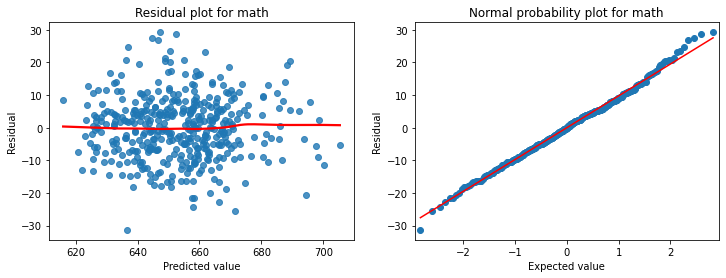

In [17]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

sns.regplot(x=res3.fittedvalues, y=res3.resid, lowess=True, line_kws={'color': 'r'}, ax=ax[0]);
ax[0].set_xlabel("Predicted value");
ax[0].set_ylabel("Residual");
ax[0].set_title("Residual plot for math");

sm.graphics.qqplot(res3.resid, line='r', ax=ax[1]);
ax[1].set_xlabel("Expected value");
ax[1].set_ylabel("Residual");
ax[1].set_title("Normal probability plot for math");

fig_name = "22-residuals-mod3.png"
plt.savefig(fig_path / fig_name)

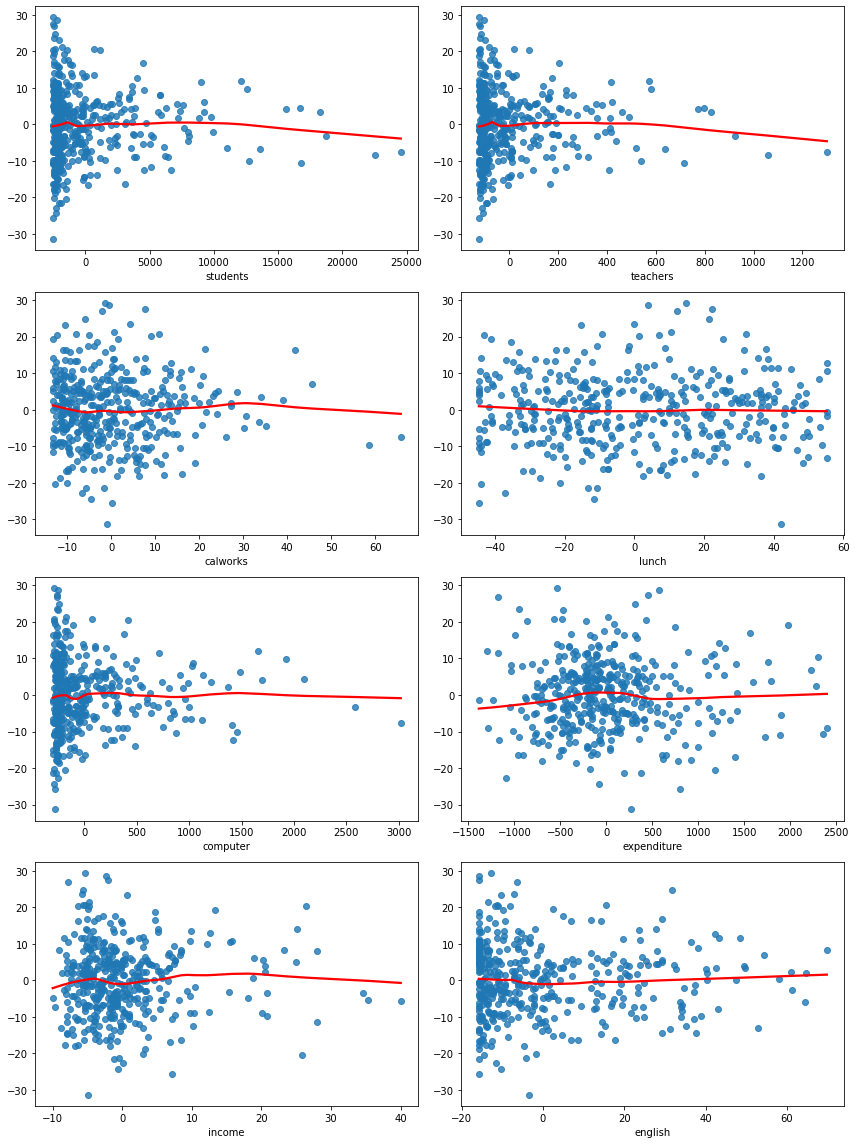

In [18]:
fig, ax = plt.subplots(4, 2, tight_layout=True)
fig.set_size_inches(12, 16)

ls = ['students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure',
      'income', 'english']

i = 0
for pred in ls:
    row = floor(i / 2)
    col = i % 2
    sns.regplot(x=df[pred], y=res3.resid, lowess=True,
                ax=ax[row, col], line_kws={'color': 'r'})
    i += 1
    
fig_name = "23-residuals-mod3.png"
plt.savefig(fig_path / fig_name)

The residual plots indicate an appropriate regression relationship and normal error terms. Some heteroskedascity is evident. To further examine whether or not heteroskedascity is present, we will conduct the Breusch Pagan test.

In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp3 = pd.DataFrame()
bp3['name'] = ['lagrange_multiplier_stat', 'lagrange_p_val',
               'f_stat', 'f_p_val']

bp3['value'] = het_breuschpagan(res3.resid, X3)

bp3

,name,value
0,lagrange_multiplier_stat,20.858607
1,lagrange_p_val,0.013293
2,f_stat,2.380674
3,f_p_val,0.012377


The Breusch-Pagan Test rejects the assumption of constant error terms at the 0.05 level of significance. Remedial measures, such as a weighted least squares approach, should be used to fit the final model if Model 3 is used.

### Multicollinearity?

The correlation matrix and large conditional number indicate serious multicollinearity in this model. For further examination, we will analyze the variance inflation factors for each predictor.

In [20]:
vif = pd.DataFrame()

vif['predictor'] = X3.columns
vif['vif'] = [variance_inflation_factor(X3, i) for i in range(X3.shape[1])]

vif

,predictor,vif
0,Intercept,2.084122
1,calworks,5.047132
2,lunch,6.773655
3,computer,1.277599
4,expenditure,1.268161
5,income,7.541731
6,np.square(income),6.779307
7,english,2.478948
8,calworks:income,6.117759
9,income:expenditure,2.428498


The max variance inflation factor falls below 10, suggesting that multicollinearity is not a serious problem for Model 3. The regression estimates should still be relatively stable. We note that the estimates for Model 3 are less stable than for Model 2.

### Outliers and influence?
We will now examine outliers and their influence on the fitted regression function.

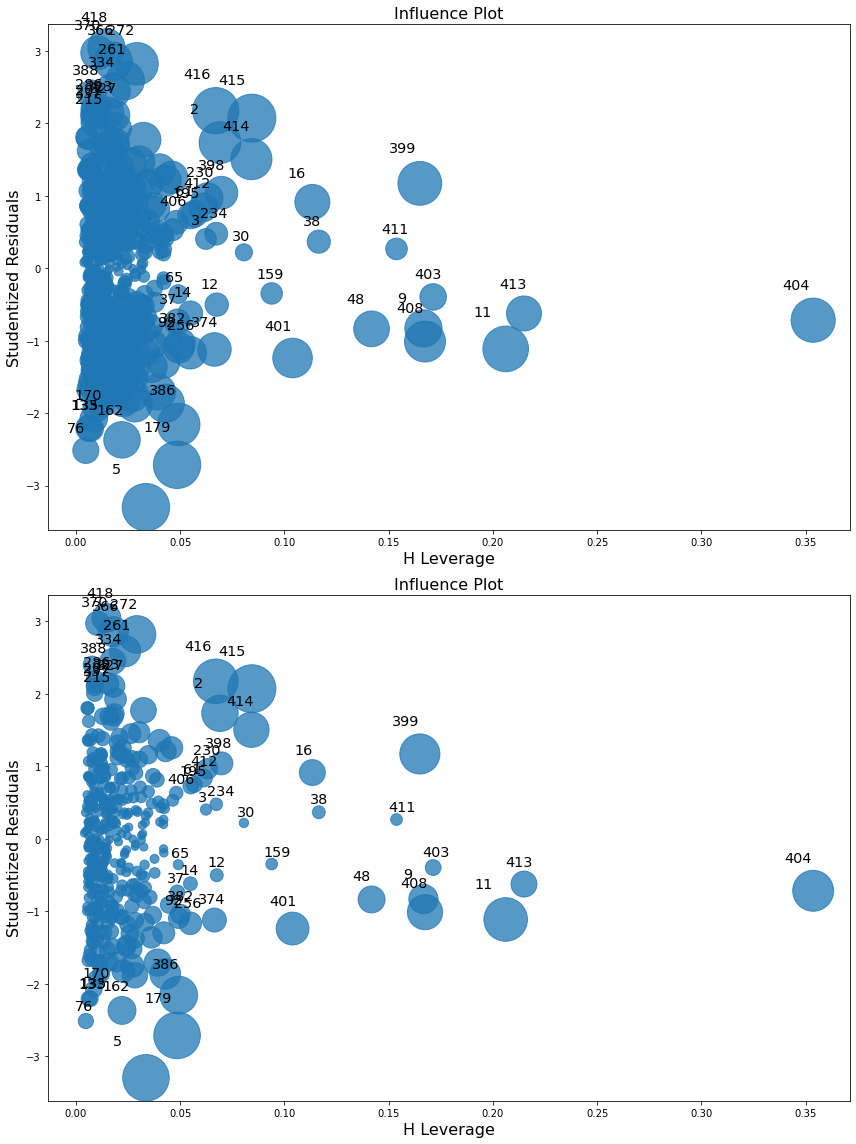

In [21]:
fig, ax = plt.subplots(2, 1, tight_layout=True)
fig.set_size_inches(12, 16)
sm.graphics.influence_plot(res3, criterion='dffits', ax=ax[0]);
sm.graphics.influence_plot(res3, criterion='cooks', ax=ax[1]);

fig_name = "24-influence-plot-mod3.png"
plt.savefig(fig_path / fig_name)

Cases 5, 179, 415, and 416 appear to be the most influential outliers according to both the DFFITS and Cook's measures.

In [22]:
infl3 = res3.get_influence()
df_infl3 = infl3.summary_frame()

df_infl3.head()

,dfb_Intercept,dfb_calworks,dfb_lunch,dfb_computer,dfb_expenditure,dfb_income,dfb_np.square(income),dfb_english,dfb_calworks:income,dfb_income:expenditure,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.003189,-0.059104,-0.017694,-0.007542,0.078015,-0.026655,-0.093200,0.002548,-0.084572,0.055212,0.002658,0.977219,0.027079,0.163029,0.977165,0.163020
1,0.015539,-0.004545,-0.014144,0.007859,-0.005928,-0.062127,0.036252,-0.034311,-0.001031,0.007749,0.001157,1.192260,0.008076,0.107580,1.192875,0.107636
2,-0.079122,0.131944,-0.169831,-0.050208,-0.025469,-0.119815,-0.087914,0.099898,-0.212712,0.011252,0.022151,1.727833,0.069073,0.470652,1.732042,0.471798
3,-0.010230,-0.015396,0.012123,0.008795,0.063242,-0.027772,0.010014,-0.034231,-0.031768,-0.049880,0.001086,0.404009,0.062373,0.104202,0.403597,0.104095
4,-0.003206,-0.004072,0.007516,0.001357,-0.003944,-0.006196,-0.006904,-0.011342,-0.015010,0.003735,0.000073,0.200960,0.017688,0.026967,0.200724,0.026935


In [23]:
df_infl3.loc[[5, 179, 415, 416], ['dffits', 'cooks_d']]

,dffits,cooks_d
5,-0.614431,0.036865
179,-0.612271,0.036915
415,0.628382,0.039173
416,0.582574,0.033634


In [24]:
f.ppf(0.039173, dfn=10, dfd=410)

0.36556141084946436

Case 415, the most influential case, corresponds to the 37% percentile of the F distribution with 10 and 410 degrees of freedom. We conclude that none of the outliers are overly influential on the fitted model, but note this model is more susceptible to influential outliers than Model 2.

## Model 4: $Y = X_0 + X_3 + X_5 + X_8 + X_{10} + X_{11} + \epsilon$

In [25]:
fm4 = """math ~ calworks + lunch +
      + income + english + calworks:income"""

# Design matrices
y4, X4 = dmatrices(fm4, data=df, return_type='dataframe')

# Fit model
mod4 = sm.OLS(y4, X4)
res4 = mod4.fit()

print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     221.7
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.18e-114
Time:                        18:13:02   Log-Likelihood:                -1553.2
No. Observations:                 420   AIC:                             3118.
Df Residuals:                     414   BIC:                             3143.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         651.9168      0.682    9

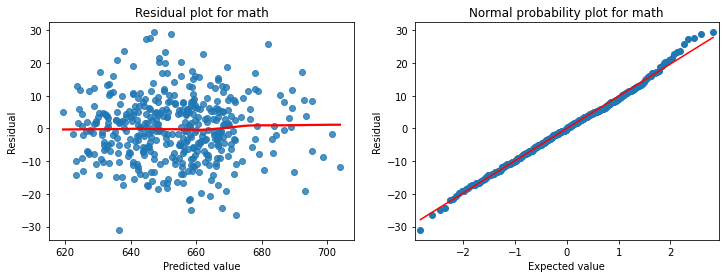

In [26]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

sns.regplot(x=res4.fittedvalues, y=res4.resid, lowess=True, line_kws={'color': 'r'}, ax=ax[0]);
ax[0].set_xlabel("Predicted value");
ax[0].set_ylabel("Residual");
ax[0].set_title("Residual plot for math");

sm.graphics.qqplot(res4.resid, line='r', ax=ax[1]);
ax[1].set_xlabel("Expected value");
ax[1].set_ylabel("Residual");
ax[1].set_title("Normal probability plot for math");

fig_name = "25-residuals-mod4.png"
plt.savefig(fig_path / fig_name)

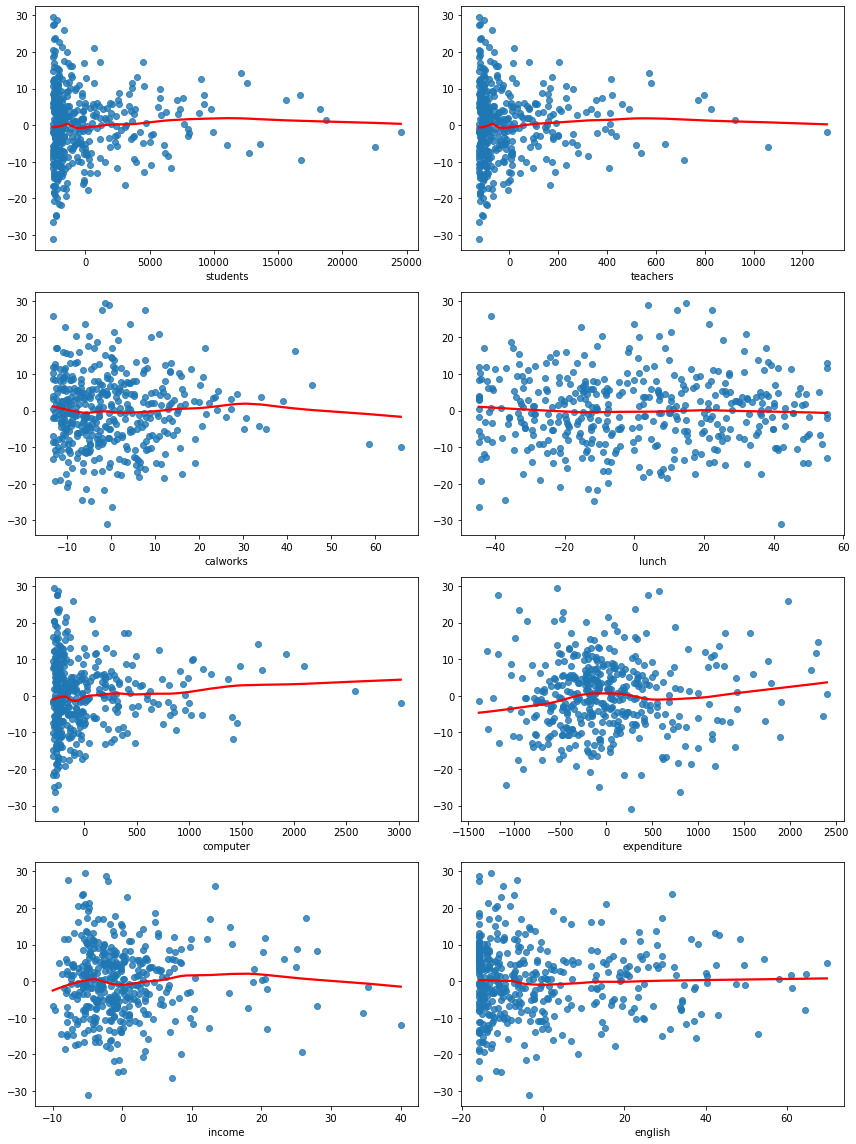

In [27]:
fig, ax = plt.subplots(4, 2, tight_layout=True)
fig.set_size_inches(12, 16)

ls = ['students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure',
      'income', 'english']

i = 0
for pred in ls:
    row = floor(i / 2)
    col = i % 2
    sns.regplot(x=df[pred], y=res4.resid, lowess=True,
                ax=ax[row, col], line_kws={'color': 'r'})
    i += 1
    
fig_name = "26-residuals-mod4.png"
plt.savefig(fig_path / fig_name)

The residual plots indicate some curvature in the response with respect to income. The normal probability plot suggests that the error terms are reasonably normal. Some heteroskedascity is evident. To further examine whether or not heteroskedascity is present, we will conduct the Breusch Pagan test.

In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp3 = pd.DataFrame()
bp3['name'] = ['lagrange_multiplier_stat', 'lagrange_p_val',
               'f_stat', 'f_p_val']

bp3['value'] = het_breuschpagan(res4.resid, X4)

bp3

,name,value
0,lagrange_multiplier_stat,10.185077
1,lagrange_p_val,0.070158
2,f_stat,2.057818
3,f_p_val,0.069762


The Breusch-Pagan Test does not reject the assumption of constant error terms at the 0.05 level of significance. No remedial measures appear needed to address non-constant error variance.

### Multicollinearity?

In [29]:
vif = pd.DataFrame()

vif['predictor'] = X4.columns
vif['vif'] = [variance_inflation_factor(X4, i) for i in range(X4.shape[1])]

vif

,predictor,vif
0,Intercept,2.020603
1,calworks,3.898103
2,lunch,5.572698
3,income,5.769393
4,english,2.101649
5,calworks:income,3.688155


The max variance inflation factor falls below 10, suggesting that multicollinearity is not a serious problem for Model 4. The regression estimates should still be relatively stable, but still less stable than for Model 2.

### Outliers and influence?
We will now examine outliers and their influence on the fitted regression function.

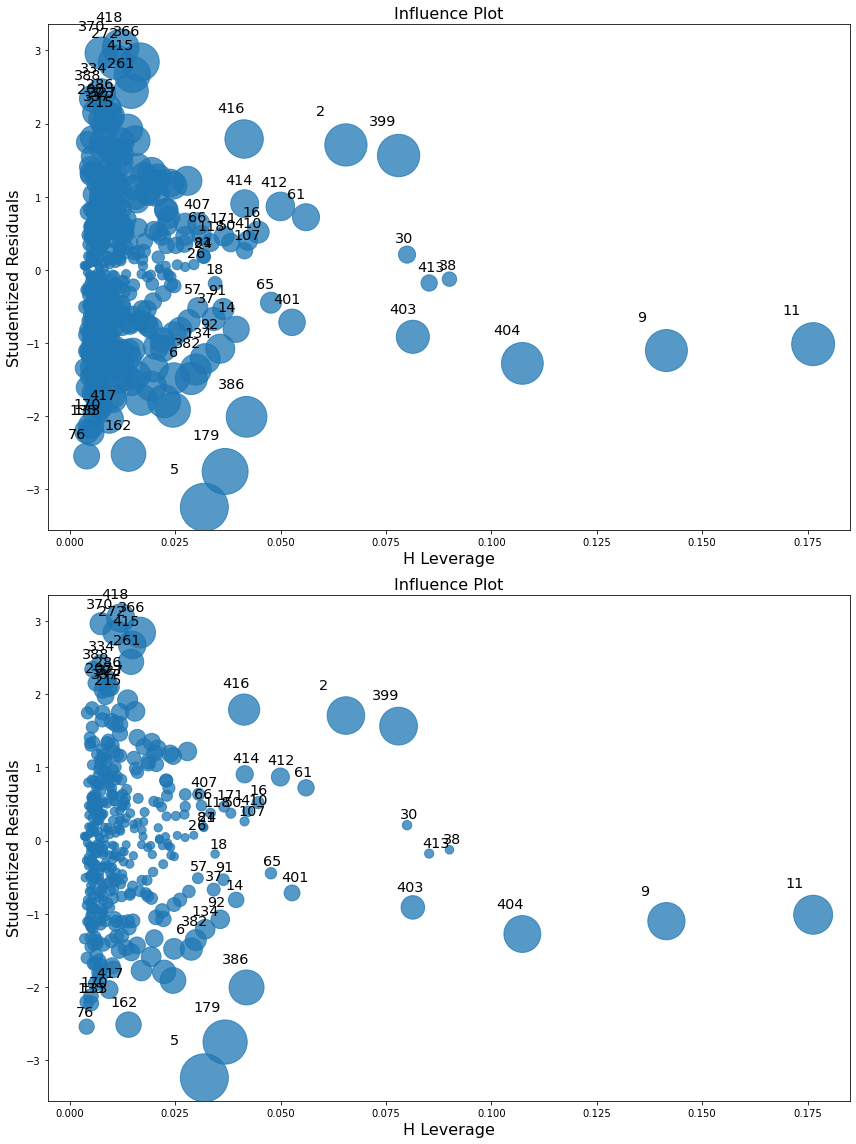

In [30]:
fig, ax = plt.subplots(2, 1, tight_layout=True)
fig.set_size_inches(12, 16)
sm.graphics.influence_plot(res4, criterion='dffits', ax=ax[0]);
sm.graphics.influence_plot(res4, criterion='cooks', ax=ax[1]);

fig_name = "27-influence-plot-mod4.png"
plt.savefig(fig_path / fig_name)

Case 5 appears to be the most influential outlier with respect to both the DFFITS and Cook's measures.

In [31]:
infl4 = res4.get_influence()
df_infl4 = infl4.summary_frame()

df_infl4.head()

,dfb_Intercept,dfb_calworks,dfb_lunch,dfb_income,dfb_english,dfb_calworks:income,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.003922,-0.024648,-0.058320,-0.048572,0.012507,-0.053731,0.002612,1.219579,0.010427,0.125189,1.220300,0.125263
1,0.016788,-0.024617,0.002568,-0.051495,-0.042533,-0.033506,0.001507,1.178374,0.006468,0.095079,1.178929,0.095124
2,-0.086355,0.177188,-0.223111,-0.189361,0.110613,-0.206877,0.033943,1.704699,0.065492,0.451286,1.708647,0.452331
3,-0.009225,-0.003905,0.013545,-0.020322,-0.033466,-0.030421,0.000592,0.356530,0.027170,0.059582,0.356154,0.059520
4,-0.003453,-0.002001,0.005880,-0.011855,-0.012244,-0.016796,0.000164,0.245413,0.016115,0.031408,0.245134,0.031373


In [32]:
df_infl4.loc[5, ['dffits', 'cooks_d']]

dffits    -0.588678
cooks_d    0.056459
Name: 5, dtype: float64

In [33]:
f.ppf(0.056459, dfn=6, dfd=414)

0.2859366739547045

Case 5, the most influential case, corresponds to the 29th percentile of the F distribution with 6 and 414 degrees of freedom. We conclude that none of the outliers are overly influential on the fitted model, but note this model is more susceptible to influential outliers than Model 2 and less susceptible to influential outliers than Model 3.

## Model 5: $Y = X_0 + X_5 + X_8 + X_{10} + \epsilon$

The fifth candidate model includes lunch, income, and english as predictors.

In [34]:
fm5 = """math ~ lunch + income + english"""

# Design matrices
y5, X5 = dmatrices(fm5, data=df, return_type='dataframe')

# Fit model
mod5 = sm.OLS(y5, X5)
res5 = mod5.fit()

print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     357.5
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          9.44e-115
Time:                        18:13:05   Log-Likelihood:                -1558.9
No. Observations:                 420   AIC:                             3126.
Df Residuals:                     416   BIC:                             3142.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    653.3426      0.486   1345.704      0.0

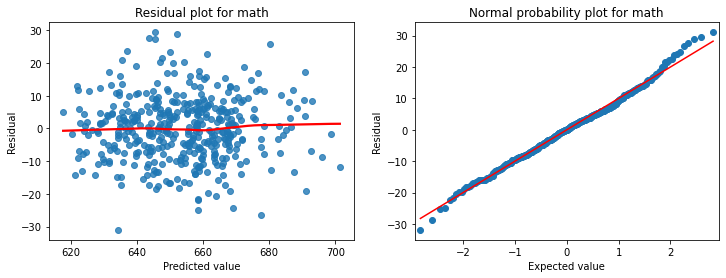

In [35]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

sns.regplot(x=res5.fittedvalues, y=res4.resid, lowess=True, line_kws={'color': 'r'}, ax=ax[0]);
ax[0].set_xlabel("Predicted value");
ax[0].set_ylabel("Residual");
ax[0].set_title("Residual plot for math");

sm.graphics.qqplot(res5.resid, line='r', ax=ax[1]);
ax[1].set_xlabel("Expected value");
ax[1].set_ylabel("Residual");
ax[1].set_title("Normal probability plot for math");

fig_name = "28-residuals-mod5.png"
plt.savefig(fig_path / fig_name)

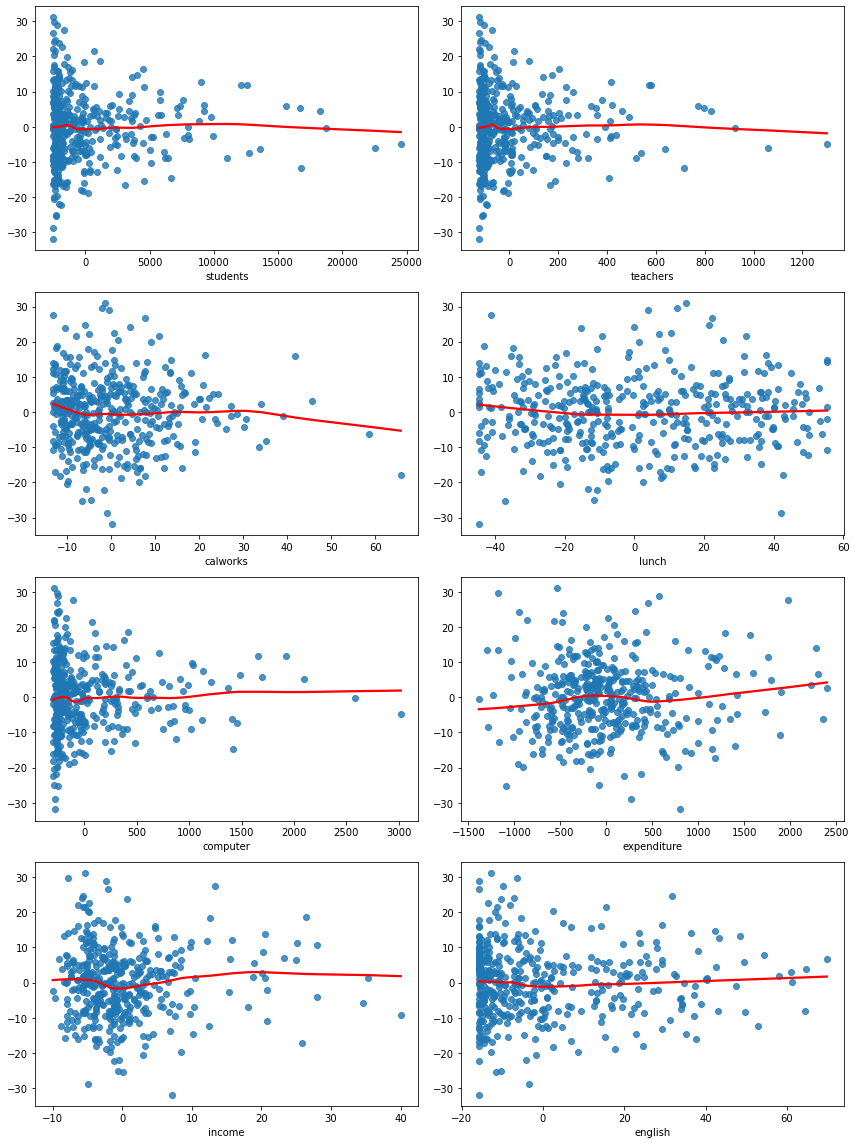

In [36]:
fig, ax = plt.subplots(4, 2, tight_layout=True)
fig.set_size_inches(12, 16)

ls = ['students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure',
      'income', 'english']

i = 0
for pred in ls:
    row = floor(i / 2)
    col = i % 2
    sns.regplot(x=df[pred], y=res5.resid, lowess=True,
                ax=ax[row, col], line_kws={'color': 'r'})
    i += 1
    
fig_name = "29-residuals-mod5.png"
plt.savefig(fig_path / fig_name)

The residual plots indicate some curvature in the response with respect to expenditure. The normal probability plot suggests that the error terms are reasonably normal. Some heteroskedascity is evident. To further examine whether or not heteroskedascity is present, we will conduct the Breusch Pagan test.

In [37]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp3 = pd.DataFrame()
bp3['name'] = ['lagrange_multiplier_stat', 'lagrange_p_val',
               'f_stat', 'f_p_val']

bp3['value'] = het_breuschpagan(res5.resid, X5)

bp3

,name,value
0,lagrange_multiplier_stat,5.313099
1,lagrange_p_val,0.150255
2,f_stat,1.776641
3,f_p_val,0.150945


The Breusch-Pagan Test fails to reject the assumption of constant error terms at the 0.05 level of significance. No remedial measures seem warranted.

### Added-variable plots
We will now check to see whether or not interaction terms are helpful.

eval_env: 1
eval_env: 1
eval_env: 1


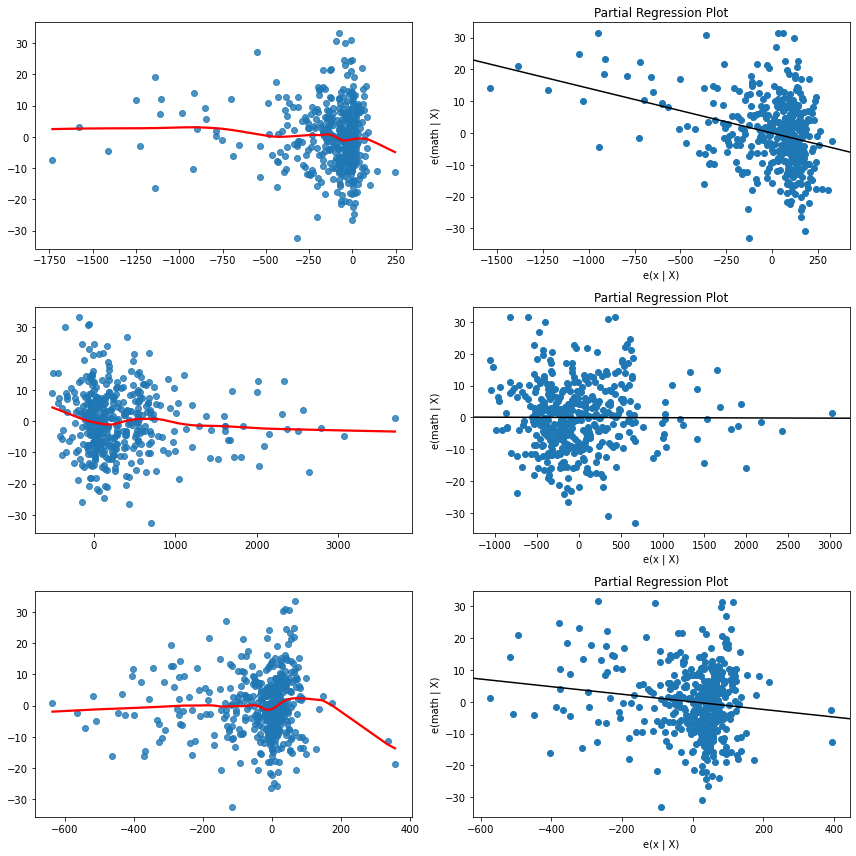

In [38]:
fig, ax = plt.subplots(3, 2, tight_layout=True)
fig.set_size_inches(12, 12)

sns.regplot(x=(df['lunch']*df['income']), y=res2.resid, lowess=True, 
            line_kws={'color': 'r'}, ax=ax[0,0]);
sm.graphics.plot_partregress(y1, (df['lunch']*df['income']), X1, 
                             ax=ax[0,1], obs_labels=False);

sns.regplot(x=(df['lunch']*df['english']), y=res2.resid, lowess=True, 
            line_kws={'color': 'r'}, ax=ax[1,0]);
sm.graphics.plot_partregress(y1, (df['lunch']*df['english']), X1, 
                             ax=ax[1,1], obs_labels=False);

sns.regplot(x=(df['income']*df['english']), y=res2.resid, lowess=True, 
            line_kws={'color': 'r'}, ax=ax[2,0]);
sm.graphics.plot_partregress(y1, (df['income']*df['english']), X1, 
                             ax=ax[2,1], obs_labels=False);

fig_name = "30-added-variable-mod5.png"
plt.savefig(fig_path / fig_name)

Adding an interaction term for lunch and income appears to have a signficant effect on the response.

### Multicollinearity?

The correlation matrix indicates moderate pairwise correlations between lunch, income, and english. To further examine multicollinearity, we will consider the variance inflation factors.

In [39]:
vif = pd.DataFrame()

vif['predictor'] = X5.columns
vif['vif'] = [variance_inflation_factor(X5, i) for i in range(X5.shape[1])]

vif

,predictor,vif
0,Intercept,1.000000
1,lunch,3.173067
2,income,2.009723
3,english,1.862653


The max variance inflation factor falls well below 10, suggesting that multicollinearity is not a serious problem for Model 5. The regression estimates should still be relatively stable.

### Outliers and influence?
We will now examine outliers and their influence on the fitted regression function.

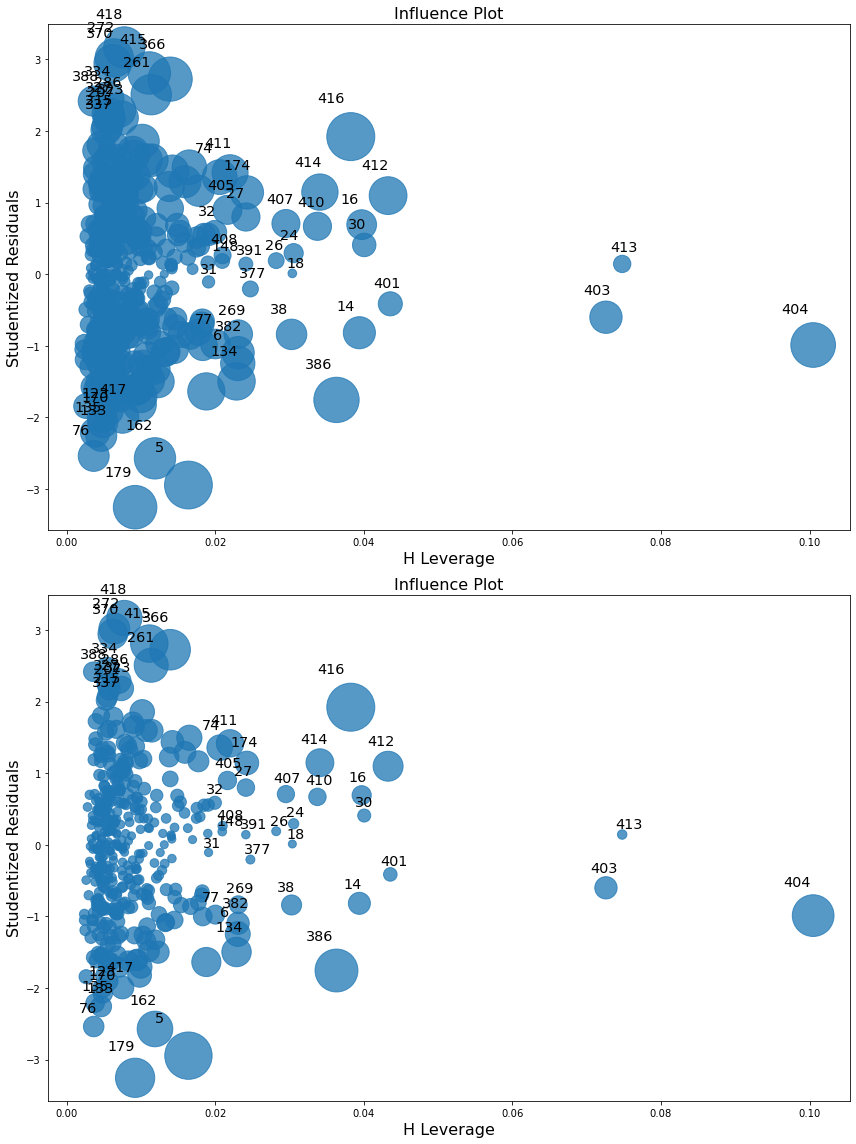

In [40]:
fig, ax = plt.subplots(2, 1, tight_layout=True)
fig.set_size_inches(12, 16)
sm.graphics.influence_plot(res5, criterion='dffits', ax=ax[0]);
sm.graphics.influence_plot(res5, criterion='cooks', ax=ax[1]);

fig_name = "31-influence-plot-mod5.png"
plt.savefig(fig_path / fig_name)

Case 416 appears to be the most influential outlier with respect to both the DFFITS and Cook's measures.

In [41]:
infl5 = res5.get_influence()
df_infl5 = infl5.summary_frame()

df_infl5.head()

,dfb_Intercept,dfb_lunch,dfb_income,dfb_english,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.064693,-0.069960,-0.008845,0.015884,0.003704,1.319020,0.008444,0.121720,1.320197,0.121829
1,0.061453,0.001248,-0.044608,-0.042883,0.002235,1.254989,0.005644,0.094554,1.255859,0.094619
2,0.079161,0.044704,-0.009383,0.004096,0.003709,1.614590,0.005659,0.121801,1.617725,0.122037
3,0.025218,0.051515,0.012109,-0.055996,0.001173,0.512712,0.017531,0.068488,0.512257,0.068428
4,0.018157,0.026985,0.005435,-0.022657,0.000339,0.370669,0.009778,0.036834,0.370284,0.036796


In [42]:
df_infl5.loc[416,  ['dffits', 'cooks_d']]

dffits     0.383351
cooks_d    0.036503
Name: 416, dtype: float64

In [43]:
f.ppf(0.036503, dfn=4, dfd=416)

0.14877232542634353

Case 416, the most influential case, corresponds to the 15% percentile of the F distribution with 4 and 416 degrees of freedom. We conclude that none of the outliers are overly influential on the fitted model.

## Model 6: $Y = X_0 + X_5 + X_8 + X_10 + X_5 X_8 + \epsilon$

When analyzing Model 5, we saw that adding an interaction term for lunch and income has an important effect on the response.

In [44]:
fm6 = """math ~ lunch*income + english"""

# Design matrices
y6, X6 = dmatrices(fm6, data=df, return_type='dataframe')

# Fit model
mod6 = sm.OLS(y6, X6)
res6 = mod6.fit()

print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     272.5
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.25e-114
Time:                        18:13:09   Log-Likelihood:                -1556.1
No. Observations:                 420   AIC:                             3122.
Df Residuals:                     415   BIC:                             3142.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      652.3207      0.649   1004.445   

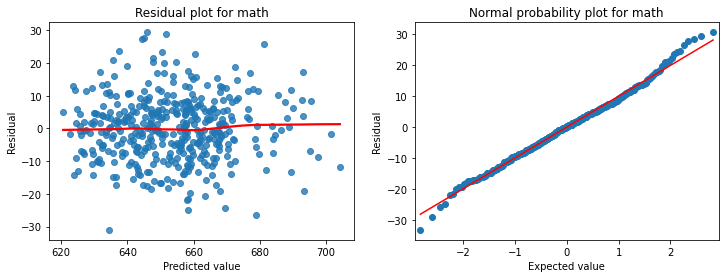

In [45]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

sns.regplot(x=res6.fittedvalues, y=res4.resid, lowess=True, line_kws={'color': 'r'}, ax=ax[0]);
ax[0].set_xlabel("Predicted value");
ax[0].set_ylabel("Residual");
ax[0].set_title("Residual plot for math");

sm.graphics.qqplot(res6.resid, line='r', ax=ax[1]);
ax[1].set_xlabel("Expected value");
ax[1].set_ylabel("Residual");
ax[1].set_title("Normal probability plot for math");

fig_name = "32-residuals-mod6.png"
plt.savefig(fig_path / fig_name)

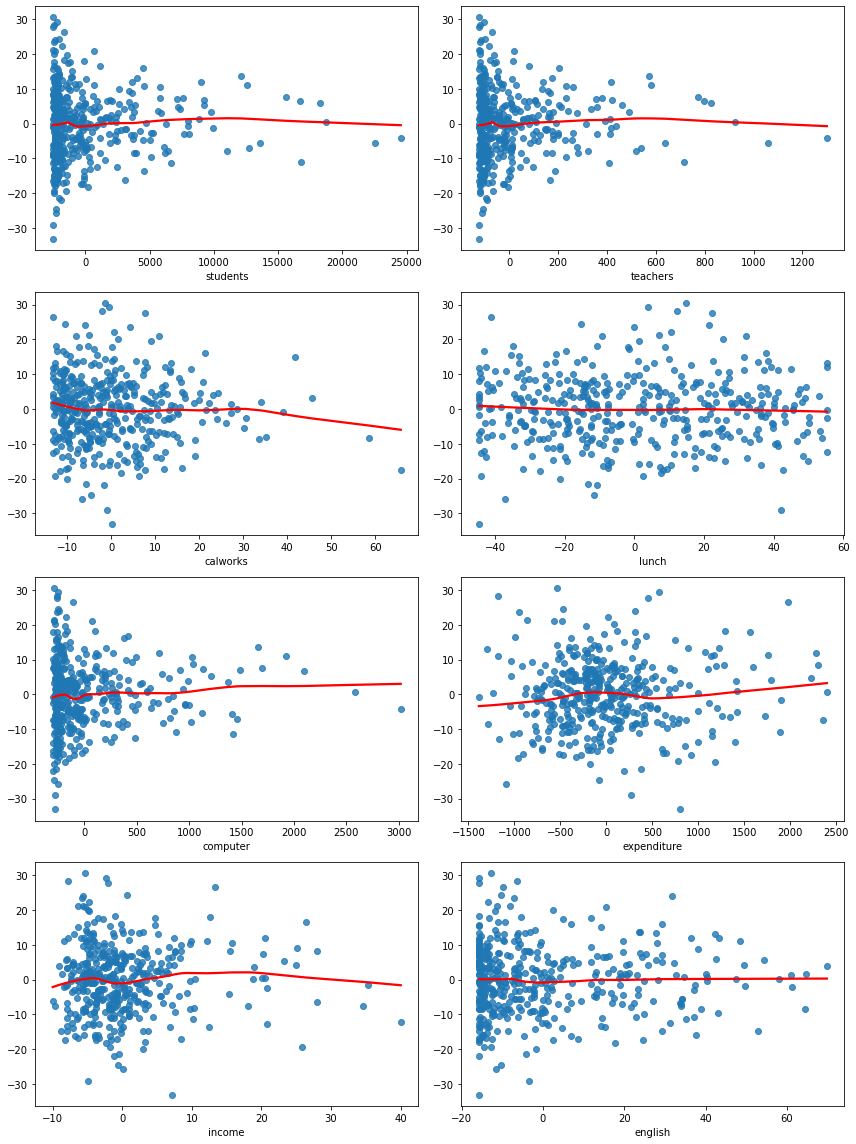

In [46]:
fig, ax = plt.subplots(4, 2, tight_layout=True)
fig.set_size_inches(12, 16)

ls = ['students', 'teachers', 'calworks', 'lunch', 'computer', 'expenditure',
      'income', 'english']

i = 0
for pred in ls:
    row = floor(i / 2)
    col = i % 2
    sns.regplot(x=df[pred], y=res6.resid, lowess=True,
                ax=ax[row, col], line_kws={'color': 'r'})
    i += 1
    
fig_name = "33-residuals-mod6.png"
plt.savefig(fig_path / fig_name)

The residual plots indicate no clear patterns of variation about 0. The normal probability plot suggests that the error terms are reasonably normal. Some heteroskedascity is evident. To further examine whether or not heteroskedascity is present, we will conduct the Breusch Pagan test.

In [47]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp3 = pd.DataFrame()
bp3['name'] = ['lagrange_multiplier_stat', 'lagrange_p_val',
               'f_stat', 'f_p_val']

bp3['value'] = het_breuschpagan(res6.resid, X6)

bp3

,name,value
0,lagrange_multiplier_stat,8.323309
1,lagrange_p_val,0.080428
2,f_stat,2.097625
3,f_p_val,0.080316


The Breusch-Pagan Test fails to reject the assumption of constant error terms at the 0.05 level of significance. No remedial measures seem warranted.

### Multicollinearity?

The correlation matrix indicates moderate pairwise correlations between lunch, income, and english. To further examine multicollinearity, we will consider the variance inflation factors.

In [48]:
vif = pd.DataFrame()

vif['predictor'] = X6.columns
vif['vif'] = [variance_inflation_factor(X6, i) for i in range(X6.shape[1])]

vif

,predictor,vif
0,Intercept,1.808831
1,lunch,4.060540
2,income,5.148251
3,lunch:income,2.747802
4,english,1.863948


The max variance inflation factor falls well below 10, suggesting that multicollinearity is not a serious problem, though it is more extreme than Model 5. The regression estimates should still be relatively stable.

### Outliers and influence?
We will now examine outliers and their influence on the fitted regression function.

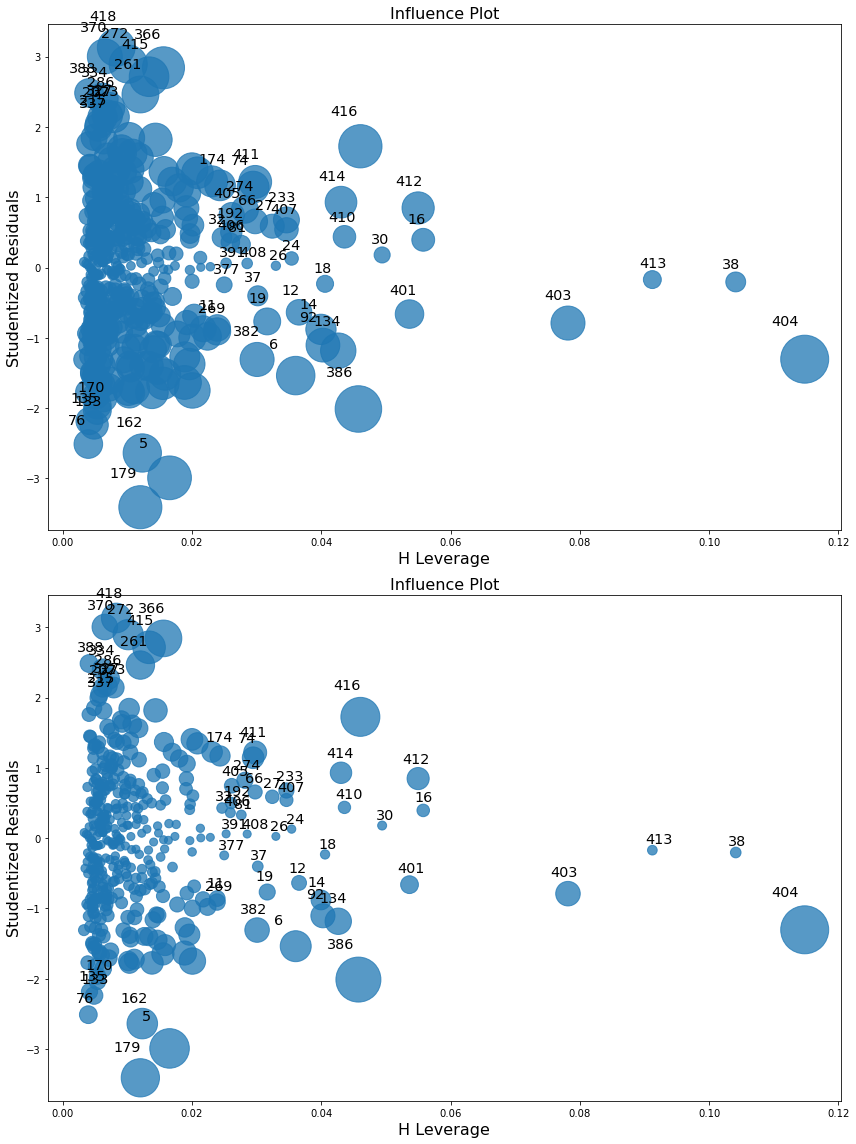

In [49]:
fig, ax = plt.subplots(2, 1, tight_layout=True)
fig.set_size_inches(12, 16)
sm.graphics.influence_plot(res6, criterion='dffits', ax=ax[0]);
sm.graphics.influence_plot(res6, criterion='cooks', ax=ax[1]);

fig_name = "34-influence-plot-mod6.png"
plt.savefig(fig_path / fig_name)

Case 404 appears to be the most influential outlier with respect to both the DFFITS and Cook's measures.

In [50]:
infl6 = res6.get_influence()
df_infl6 = infl6.summary_frame()

df_infl6.head()

,dfb_Intercept,dfb_lunch,dfb_income,dfb_lunch:income,dfb_english,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.007712,-0.083079,-0.048161,-0.055124,0.013261,0.003153,1.221406,0.010457,0.125558,1.222132,0.125633
1,0.025068,-0.012144,-0.048866,-0.028246,-0.041983,0.001815,1.207128,0.006188,0.095252,1.207795,0.095305
2,0.011800,0.006709,-0.056662,-0.065480,0.002141,0.003503,1.523917,0.007485,0.132341,1.526357,0.132553
3,0.002294,0.027370,-0.008705,-0.018847,-0.044971,0.000664,0.406969,0.019638,0.057599,0.406560,0.057541
4,0.002104,0.012054,-0.006622,-0.011674,-0.016935,0.000174,0.271877,0.011605,0.029459,0.271573,0.029426


In [51]:
df_infl6.loc[404,  ['dffits', 'cooks_d']]

dffits    -0.469273
cooks_d    0.043969
Name: 404, dtype: float64

In [52]:
f.ppf(0.043969, dfn=5, dfd=415)

0.21510630846603893

Case 404, the most influential case, corresponds to the 22% percentile of the F distribution with 5 and 415 degrees of freedom. We conclude that none of the outliers are overly influential on the fitted model.

# Summary

Models 4, 5, and 6 have appropriate functional relationships and satisfy the assumptions of the linear regression model reasonably well. In the final stage of the analysis, we will validate these models.